# Challenge: What Test to Use?

Using selected questions from the 2012 and 2014 editions of the [European Social Survey](http://www.europeansocialsurvey.org/data/round-index.html), address the following questions. Here is the [data file](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv), here is the [codebook](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html), with info about the variable coding and content. 

In this dataset, the same participants answered questions in 2012 and again in 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

3. Who reported watching more TV in 2012, men or women?

4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

# Processing

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [120]:
raw_data = pd.read_csv('~/src/data/unit5/ESSdata_Thinkful.csv')
raw_data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [121]:
df = raw_data
# where '6' == 2012, '7' == 2014
df.year.value_counts()

7    4297
6    4297
Name: year, dtype: int64

In [122]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [123]:
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [124]:
df.shape

(8594, 13)

In [125]:
df = df.dropna()

In [126]:
df.shape

(8147, 13)

# EDA

tvtot
ppltrst
pplfair
pplhlp
happy
sclmeet
sclact
gndr
agea
partner


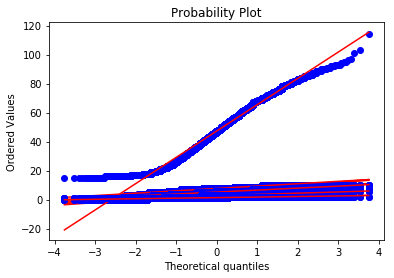

In [127]:
contVars = df.iloc[:, 3:]
import pylab
for col in contVars:
    print(col)
    stats.probplot(contVars[col], dist='norm', plot=pylab)

tvtot       3.818584
ppltrst     5.574936
pplfair     6.005155
pplhlp      5.321468
happy       7.708482
sclmeet     5.215908
sclact      2.755984
gndr        1.496379
agea       47.262182
partner     1.384681
dtype: float64


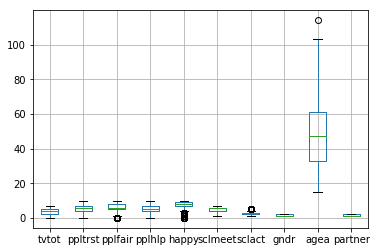

In [128]:
print(contVars.mean())
contVars.boxplot()
plt.show()

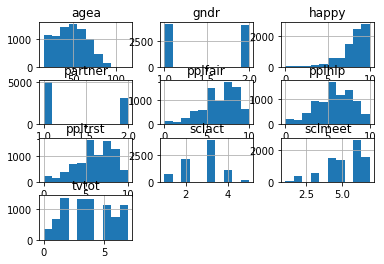

In [129]:
contVars.hist(sharey=False, sharex=False)
plt.show()

tvtot


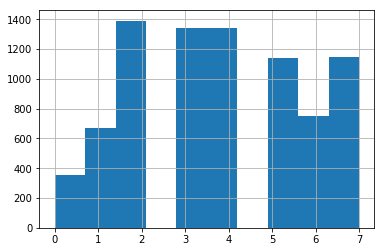

ppltrst


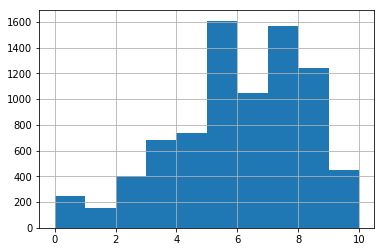

pplfair


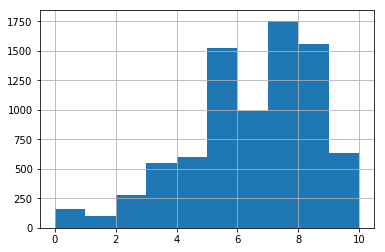

pplhlp


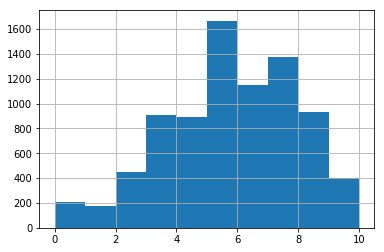

happy


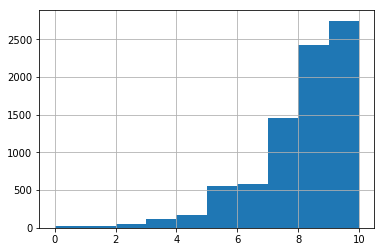

sclmeet


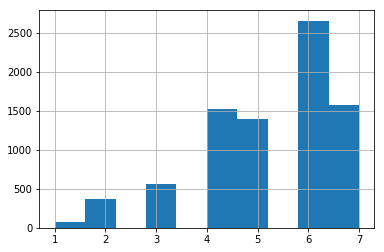

sclact


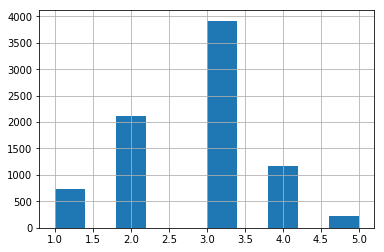

gndr


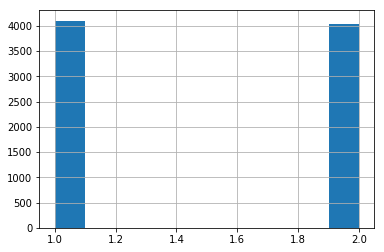

agea


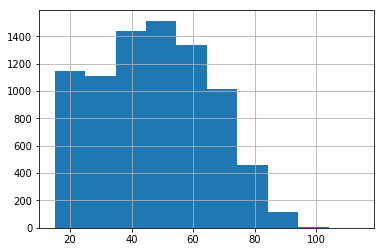

partner


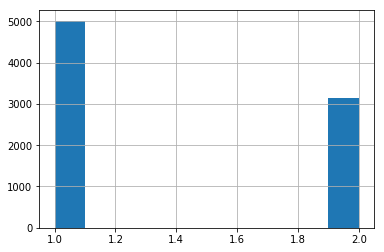

In [130]:
for col in contVars:
    print(col)
    contVars[col].hist()
    plt.show()

# Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [131]:
# ES: Spain
# SE: Sweden
# CH: Switzerland
# NO: Norway
# CZ: Czech Republic
# DE: Germany

df.cntry.value_counts()

ES    2292
SE    1726
CH    1475
NO    1420
CZ    1207
DE      27
Name: cntry, dtype: int64

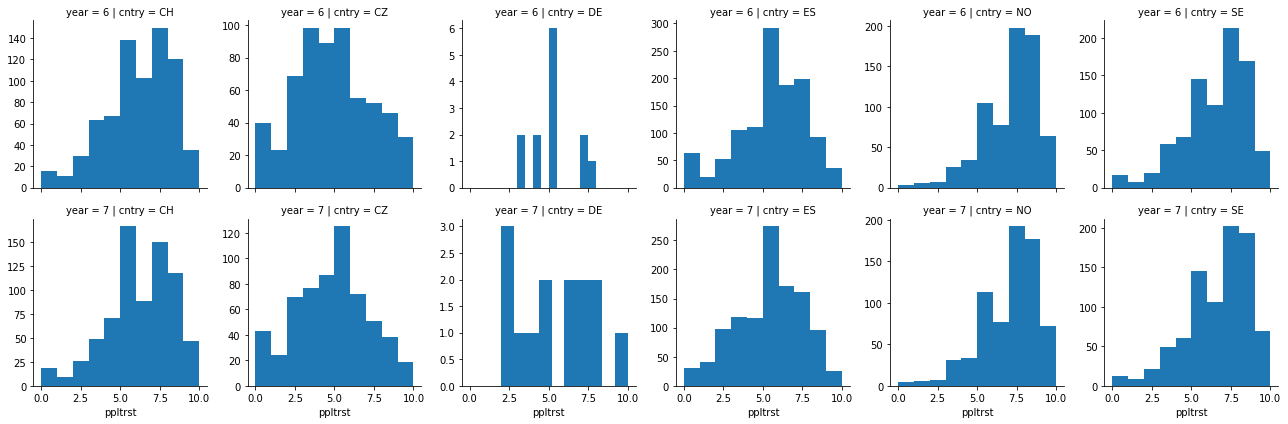

In [132]:
g = sns.FacetGrid(data = df,
                  col = 'cntry',
                  row = 'year',
                  hue = None,
                  col_wrap = None,
                  sharey = False,
                  sharex = True)
g = g.map(plt.hist, 'ppltrst')
plt.show()

In [133]:
# Parametric.
countries = ['ES', 'SE', 'CH', 'NO', 'CZ', 'DE']
for c in countries:
    a = df['ppltrst'][(df['cntry'] == c) & (df['year'] == 6)]
    b = df['ppltrst'][(df['cntry'] == c) & (df['year'] == 7)]
    print(c,':', stats.ttest_ind(a, b))
    print('Year1 mean {0:.2f}'.format(a.mean()))
    print('Year2 mean {0:.2f}\n'.format(b.mean()))

ES : Ttest_indResult(statistic=2.1000674443244907, pvalue=0.03583204193521363)
Year1 mean 5.13
Year2 mean 4.94

SE : Ttest_indResult(statistic=-2.0268698056063146, pvalue=0.0428293634522298)
Year1 mean 6.04
Year2 mean 6.24

CH : Ttest_indResult(statistic=-0.7156974792217816, pvalue=0.4742916002909491)
Year1 mean 5.69
Year2 mean 5.76

NO : Ttest_indResult(statistic=0.5119224181145228, pvalue=0.6087850218131977)
Year1 mean 6.65
Year2 mean 6.60

CZ : Ttest_indResult(statistic=0.34075433231518504, pvalue=0.7333479315909976)
Year1 mean 4.40
Year2 mean 4.36

DE : Ttest_indResult(statistic=-0.3466213170125284, pvalue=0.7317764273785732)
Year1 mean 5.08
Year2 mean 5.36



People became less trusting over the period in Spain (ES), Norway (NO), and Czech Republic (CH). Sweden (SE) and Spain (ES) had significant differences, while Sweden's (SE) level of trust increased. Changes in trust in other countries were not statistically significant with p-values > 0.05. We reject Ho: "No Change in Trust" for Spain (ES) and Sweden (SE). 

In [134]:
# Non-Parametric.
countries = ['ES', 'SE', 'CH', 'NO', 'CZ', 'DE']
for c in countries:
    a = df['ppltrst'][(df['cntry'] == c) & (df['year'] == 6)]
    b = df['ppltrst'][(df['cntry'] == c) & (df['year'] == 7)]
    print(c,':', stats.kruskal(a, b))
    print('Year1 mean {0:.2f}'.format(a.mean()))
    print('Year2 mean {0:.2f}\n'.format(b.mean()))

ES : KruskalResult(statistic=6.254399514712144, pvalue=0.012388523566141176)
Year1 mean 5.13
Year2 mean 4.94

SE : KruskalResult(statistic=4.486790845114948, pvalue=0.03415774143761488)
Year1 mean 6.04
Year2 mean 6.24

CH : KruskalResult(statistic=0.3211329972268854, pvalue=0.5709275494134165)
Year1 mean 5.69
Year2 mean 5.76

NO : KruskalResult(statistic=0.20681671394808315, pvalue=0.649273954856751)
Year1 mean 6.65
Year2 mean 6.60

CZ : KruskalResult(statistic=3.397334444818437e-05, pvalue=0.9953494239190417)
Year1 mean 4.40
Year2 mean 4.36

DE : KruskalResult(statistic=0.11943127962085082, pvalue=0.7296521329635768)
Year1 mean 5.08
Year2 mean 5.36



# Did people become happier from 2012 to 2014? Compute results for each country in the sample.

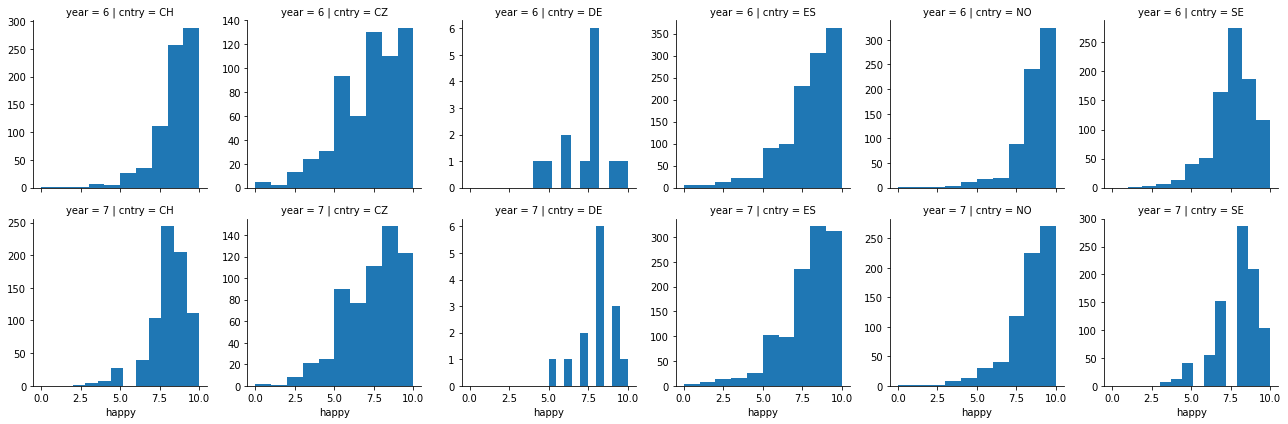

In [135]:
g = sns.FacetGrid(data = df,
                  col = 'cntry',
                  row = 'year',
                  hue = None,
                  col_wrap = None,
                  sharey = False,
                  sharex = True)
g = g.map(plt.hist, 'happy')
plt.show()

In [136]:
# Parametric.
countries = ['ES', 'SE', 'CH', 'NO', 'CZ', 'DE']
for c in countries:
    a = df['happy'][(df['cntry'] == c) & (df['year'] == 6)]
    b = df['happy'][(df['cntry'] == c) & (df['year'] == 7)]
    print(c,':', stats.ttest_ind(a, b))
    print('Year1 mean {0:.2f}'.format(a.mean()))
    print('Year2 mean {0:.2f}\n'.format(b.mean()))

ES : Ttest_indResult(statistic=1.3750588408504656, pvalue=0.16924771370417369)
Year1 mean 7.56
Year2 mean 7.45

SE : Ttest_indResult(statistic=-0.5372790210326394, pvalue=0.5911442306272388)
Year1 mean 7.90
Year2 mean 7.94

CH : Ttest_indResult(statistic=-0.812142488327401, pvalue=0.4168411011770018)
Year1 mean 8.08
Year2 mean 8.14

NO : Ttest_indResult(statistic=4.152957205997266, pvalue=3.4778681704487346e-05)
Year1 mean 8.25
Year2 mean 7.92

CZ : Ttest_indResult(statistic=-1.1592536826704618, pvalue=0.24658245820500238)
Year1 mean 6.79
Year2 mean 6.92

DE : Ttest_indResult(statistic=-0.966317541228559, pvalue=0.3431409128727073)
Year1 mean 7.31
Year2 mean 7.86



Norway's (NO) happiness decreased a great extent.

In [137]:
# Non-Parametric.
countries = ['ES', 'SE', 'CH', 'NO', 'CZ', 'DE']
for c in countries:
    a = df['happy'][(df['cntry'] == c) & (df['year'] == 6)]
    b = df['happy'][(df['cntry'] == c) & (df['year'] == 7)]
    print(c,':', stats.kruskal(a, b))
    print('Year1 mean {0:.2f}'.format(a.mean()))
    print('Year2 mean {0:.2f}\n'.format(b.mean()))

ES : KruskalResult(statistic=2.9615793608595036, pvalue=0.08526461865591295)
Year1 mean 7.56
Year2 mean 7.45

SE : KruskalResult(statistic=0.10011450993142058, pvalue=0.7516922609168144)
Year1 mean 7.90
Year2 mean 7.94

CH : KruskalResult(statistic=0.7393607796289999, pvalue=0.3898657201494511)
Year1 mean 8.08
Year2 mean 8.14

NO : KruskalResult(statistic=17.78863118177249, pvalue=2.4685385809958533e-05)
Year1 mean 8.25
Year2 mean 7.92

CZ : KruskalResult(statistic=0.7888702806828175, pvalue=0.37444194652901)
Year1 mean 6.79
Year2 mean 6.92

DE : KruskalResult(statistic=0.7954545454545382, pvalue=0.3724558699813717)
Year1 mean 7.31
Year2 mean 7.86



Using Kruskal test, Norway (NO) was the only country with a statistically significant result. Changes in trust in other countries were not statistically significant with p-values > 0.05. We reject Ho: "No Change in Happiness" for Norway (NO).

# Who reported watching more TV in 2012, men or women?

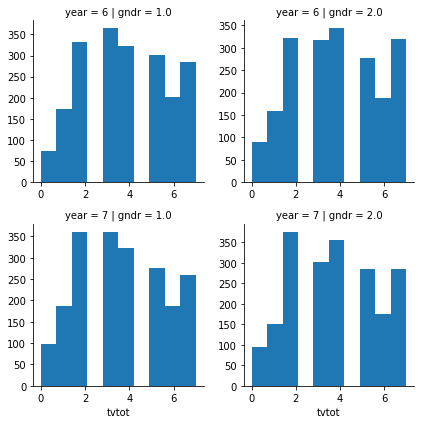

In [138]:
# Male: gndr = 1
# Female: gndr = 2
g = sns.FacetGrid(data = df,
                  col = 'gndr',
                  row = 'year',
                  hue = None,
                  col_wrap = None,
                  sharey = False,
                  sharex = False)
g = g.map(plt.hist, 'tvtot')
plt.show()

In [139]:
# Shapiro-Wilk test for Normality.
print('Male 2012:', stats.shapiro(df[df['year'] == 6][df['gndr'] == 1]['tvtot']))
print('Female 2012:', stats.shapiro(df[df['year'] == 6][df['gndr'] == 2]['tvtot']))

Male 2012: (0.9443334937095642, 3.718612884828085e-27)
Female 2012: (0.9407297372817993, 1.0867231118970029e-27)


c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [140]:
# Ho: The population is normally distributed. If p < .05, reject Ho as we do here.
# There is evidence that the data tested are NOT normally distributed.

print(3.718612884828085e-27 < 0.05)
print(1.0867231118970029e-27 < .05)

True
True


In [141]:
# Non-Parametric.
male2012 = df['tvtot'][(df['gndr'] == 1) & (df['year'] == 6)]
female2012 = df['tvtot'][(df['gndr'] == 2) & (df['year'] == 6)]

print('Mean Men TV time:', np.mean(df[df['gndr'] == 1.0]['tvtot']))
print('Mean Women TV time:', np.mean(df[df['gndr'] == 2.0]['tvtot']))

stats.kruskal(male2012, female2012)

Mean Men TV time: 3.7828418230563003
Mean Women TV time: 3.8548466864490605


KruskalResult(statistic=0.6145695087428265, pvalue=0.4330724786171142)

Women watch more TV than men. We will reject Ho: There were no changes in TV viewing by men and women during 2012.

# Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [142]:
# partner
# pplfair
# 1: lives with a partner
# 2: lives alone

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


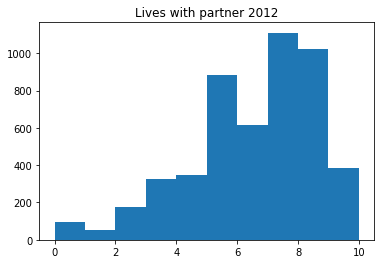

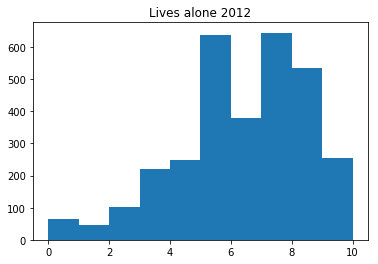

In [143]:
livesPartner2012 = df[df['partner'] == 1.0]['pplfair']
livesAlone2012 = df[df['partner'] == 2.0]['pplfair']

plt.hist(livesPartner2012)
plt.title('Lives with partner 2012')
plt.show()

plt.hist(livesAlone2012)
plt.title('Lives alone 2012')
plt.show()

In [144]:
print('partner mean', np.mean(livesPartner2012))
print('alone mean', np.mean(livesAlone2012))

partner mean 6.062238180730102
alone mean 5.913848117421825


In [145]:
print(stats.shapiro(livesPartner2012))
print(stats.shapiro(livesAlone2012))

(0.9420869946479797, 1.6676572764236783e-40)
(0.9551196098327637, 4.9899520782236515e-30)


c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Low p-values, conclude this is a non-normal distribution.

In [146]:
# Non-parametric.

print('partner median', np.median(livesPartner2012))
print('alone median', np.median(livesAlone2012))

stats.kruskal(livesPartner2012, livesAlone2012)

partner median 7.0
alone median 6.0


KruskalResult(statistic=12.699905564964231, pvalue=0.0003656740421476776)

Those who live with a partner generally believe people are more likely to be fair. Reject Ho: There is no difference in people's feelings that others generally tend to be fair between the groups of those who cohabitat or not.

#  Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [147]:
df.cntry.value_counts()

ES    2292
SE    1726
CH    1475
NO    1420
CZ    1207
DE      27
Name: cntry, dtype: int64

c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


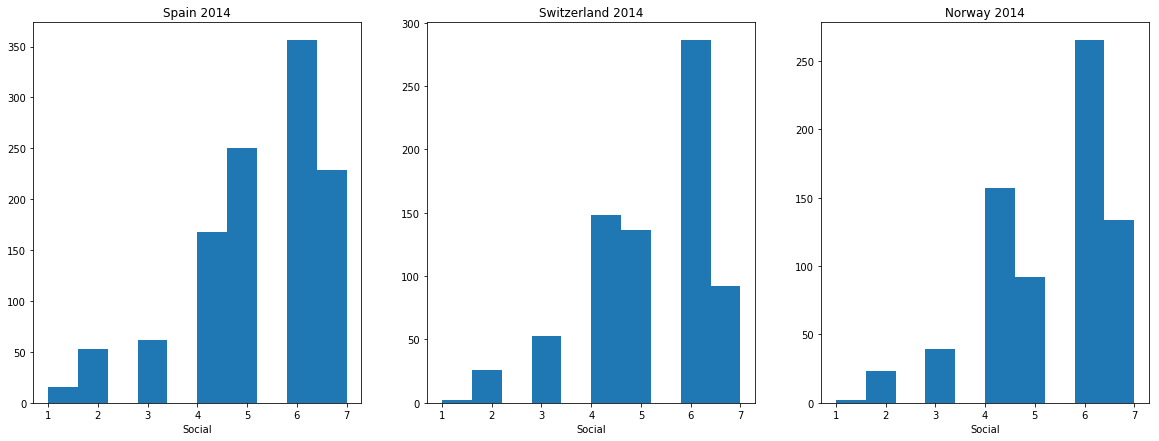

In [148]:
# SE, CH, NO

plt.figure(figsize=(20, 7))

plt.subplot(131)
plt.hist(df[df['year']==7][df['cntry']=='ES']['sclmeet'])
plt.title('Spain 2014')
plt.xlabel('Social')

plt.subplot(132)
plt.hist(df[df['year']==7][df['cntry']=='CH']['sclmeet'])
plt.title('Switzerland 2014')
plt.xlabel('Social')

plt.subplot(133)
plt.hist(df[df['year']==7][df['cntry']=='NO']['sclmeet'])
plt.title('Norway 2014')
plt.xlabel('Social')

plt.show()

In [149]:
countries3 = ['ES', 'CH', 'NO']
for c in countries3:
    print(c, stats.shapiro(df[df['year'] == 7][df['cntry'] == c]['sclmeet']))

ES (0.8927679657936096, 2.280180298346974e-27)
CH (0.8976361155509949, 7.658747353767709e-22)
NO (0.887718915939331, 2.537563078833279e-22)


c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Non-normal distributions for Spain, Czech Republic, and Norway.

In [150]:
spainSocial = df['sclmeet'][(df['cntry'] == 'ES') & (df['year'] == 7)]
czechSocial = df['sclmeet'][(df['cntry'] == 'CH') & (df['year'] == 7)]
norwaySocial = df['sclmeet'][(df['cntry'] == 'NO') & (df['year'] == 7)]

In [151]:
F, p = stats.f_oneway(spainSocial, czechSocial, norwaySocial)
print('F-stat:', F)
print('p-val:', p)

F-stat: 1.850343450323273
p-val: 0.15739121652531607


In [152]:
print('Spain mean:', spainSocial.mean())
print('Czech mean:', czechSocial.mean())
print('Norway mean:', norwaySocial.mean())

Spain mean: 5.263668430335097
Czech mean: 5.174966352624495
Norway mean: 5.310393258426966


In [153]:
print(stats.ttest_ind(spainSocial, czechSocial))
print(stats.ttest_ind(spainSocial, norwaySocial))
print(stats.ttest_ind(norwaySocial, czechSocial))

Ttest_indResult(statistic=1.3563979158247432, pvalue=0.17513589623821907)
Ttest_indResult(statistic=-0.6968046493592841, pvalue=0.48601288469157433)
Ttest_indResult(statistic=1.9524600649137105, pvalue=0.05107541004946689)


No significant difference in social encounters between the 3 countries

# Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [154]:
spainActivities = df['sclmeet'][(df['cntry'] == 'ES') & (df['year'] == 7)]
czechActivities = df['sclmeet'][(df['cntry'] == 'CH') & (df['year'] == 7)]
norwayActivities = df['sclmeet'][(df['cntry'] == 'NO') & (df['year'] == 7)]

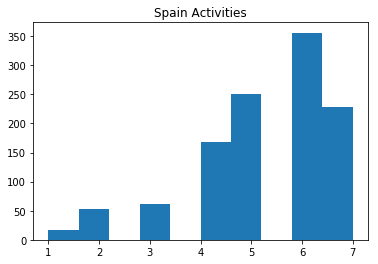

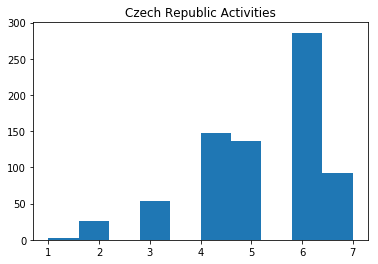

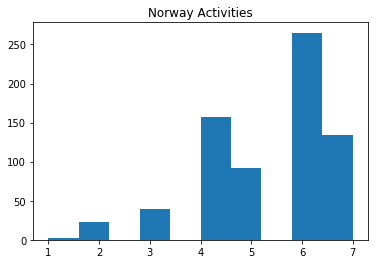

In [155]:
plt.hist(spainActivities)
plt.title('Spain Activities')
plt.show()

plt.hist(czechActivities)
plt.title('Czech Republic Activities')
plt.show()

plt.hist(norwayActivities)
plt.title('Norway Activities')
plt.show()

In [156]:
F, p = stats.f_oneway(spainActivities, czechActivities, norwayActivities)
print('F-stat:', F)
print('p-val:', p)

F-stat: 1.850343450323273
p-val: 0.15739121652531607


In [157]:
print('Spain mean:', spainActivities.mean())
print('Czech mean:', czechActivities.mean())
print('Norway mean:', norwayActivities.mean())

Spain mean: 5.263668430335097
Czech mean: 5.174966352624495
Norway mean: 5.310393258426966


In [158]:
print(stats.ttest_ind(spainActivities, czechActivities))
print(stats.ttest_ind(spainActivities, norwayActivities))
print(stats.ttest_ind(norwayActivities, czechActivities))

Ttest_indResult(statistic=1.3563979158247432, pvalue=0.17513589623821907)
Ttest_indResult(statistic=-0.6968046493592841, pvalue=0.48601288469157433)
Ttest_indResult(statistic=1.9524600649137105, pvalue=0.05107541004946689)


ANOVA p-value returns no differences between the countries. T-test yields similar.